In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer,PowerTransformer,MaxAbsScaler,RobustScaler,Normalizer
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


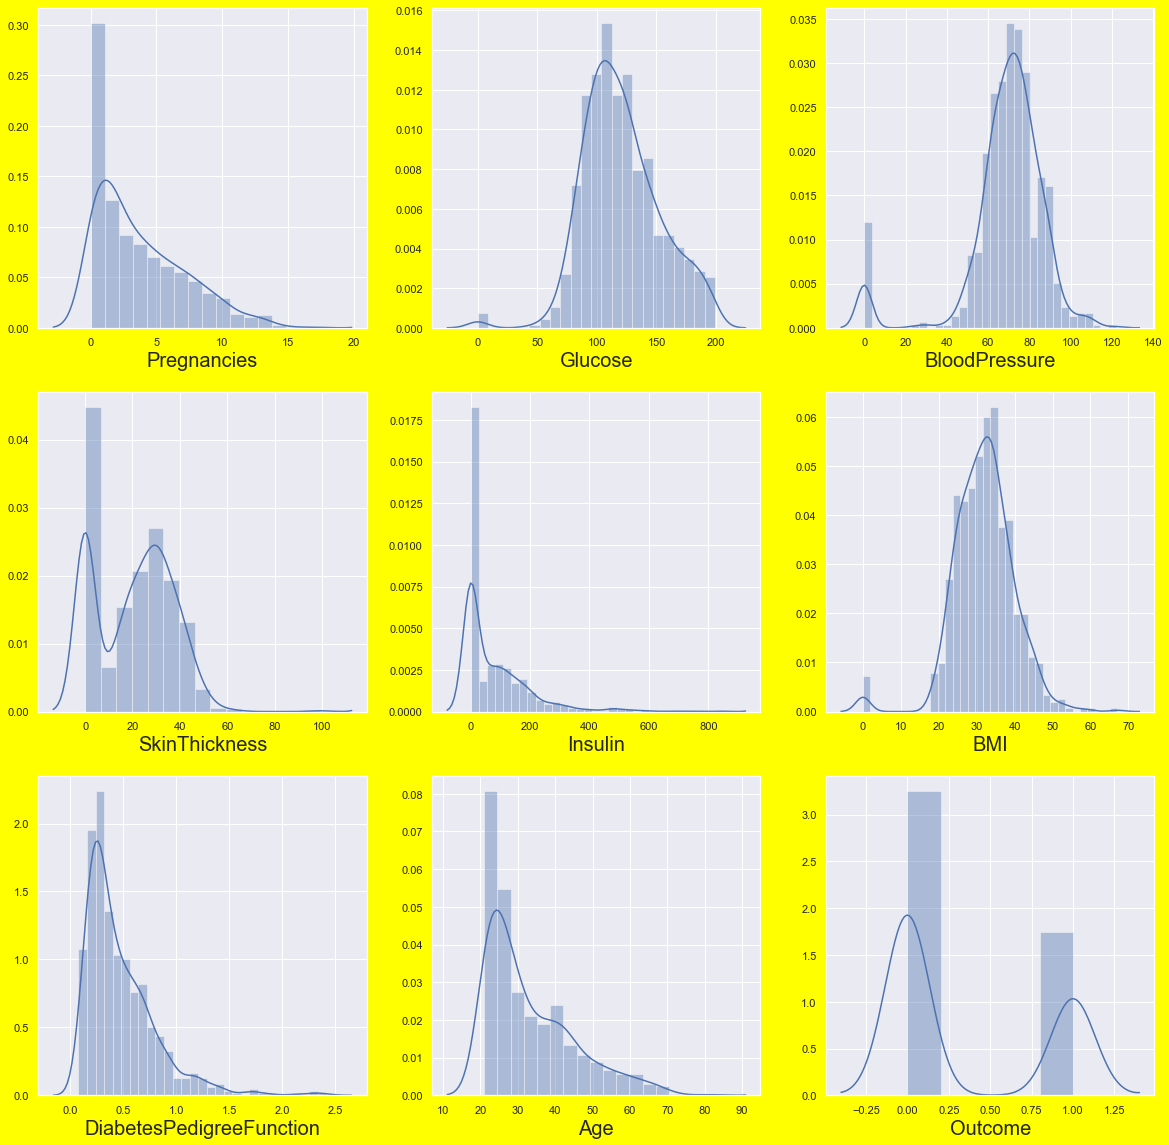

In [4]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1
for columns in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
plt.show()

In [5]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

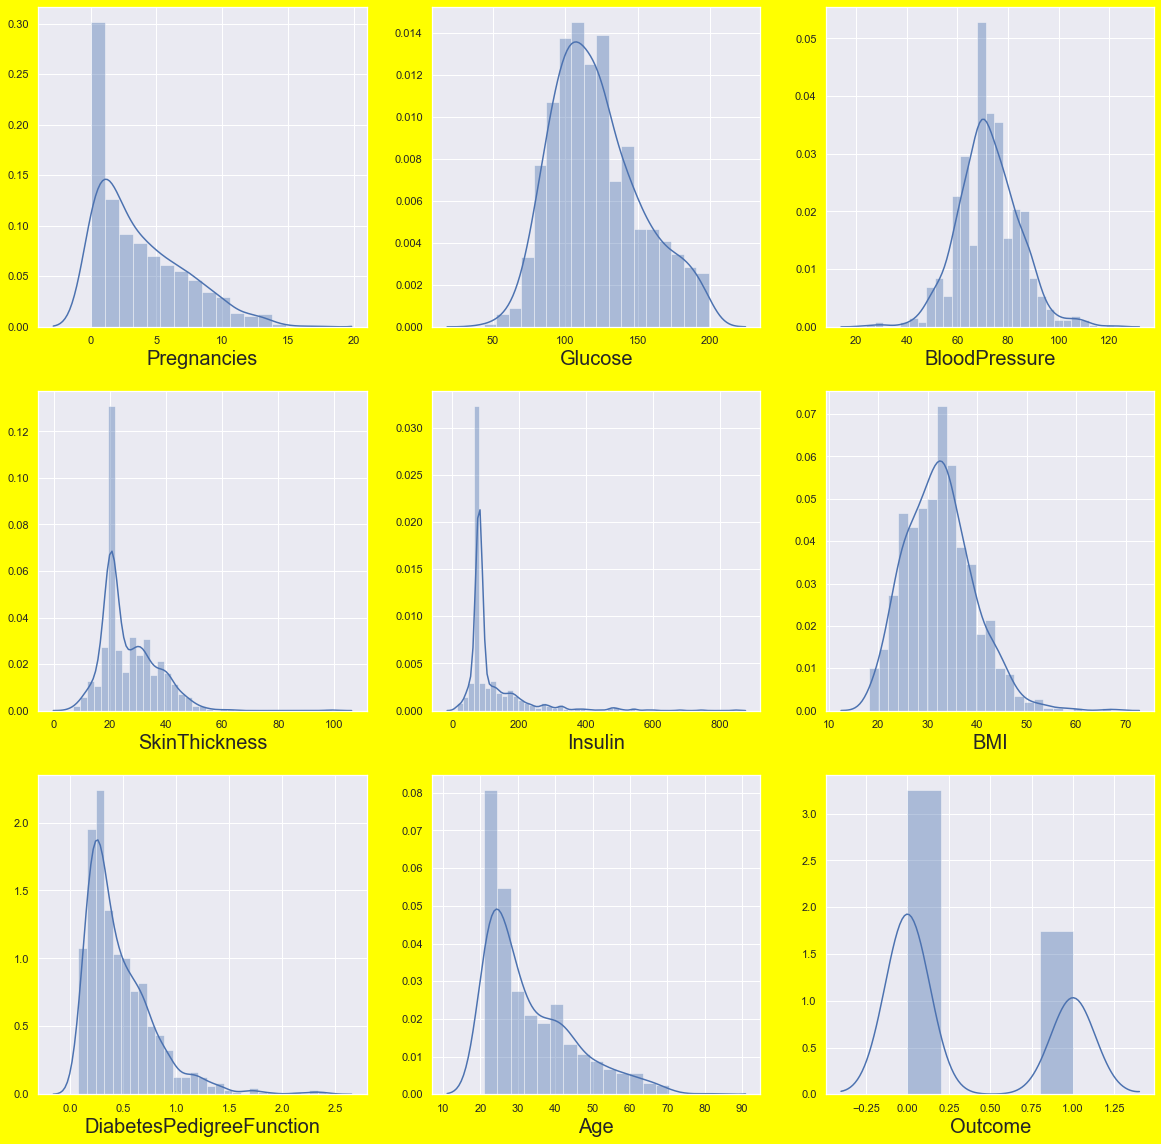

In [6]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1
for columns in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
plt.show()

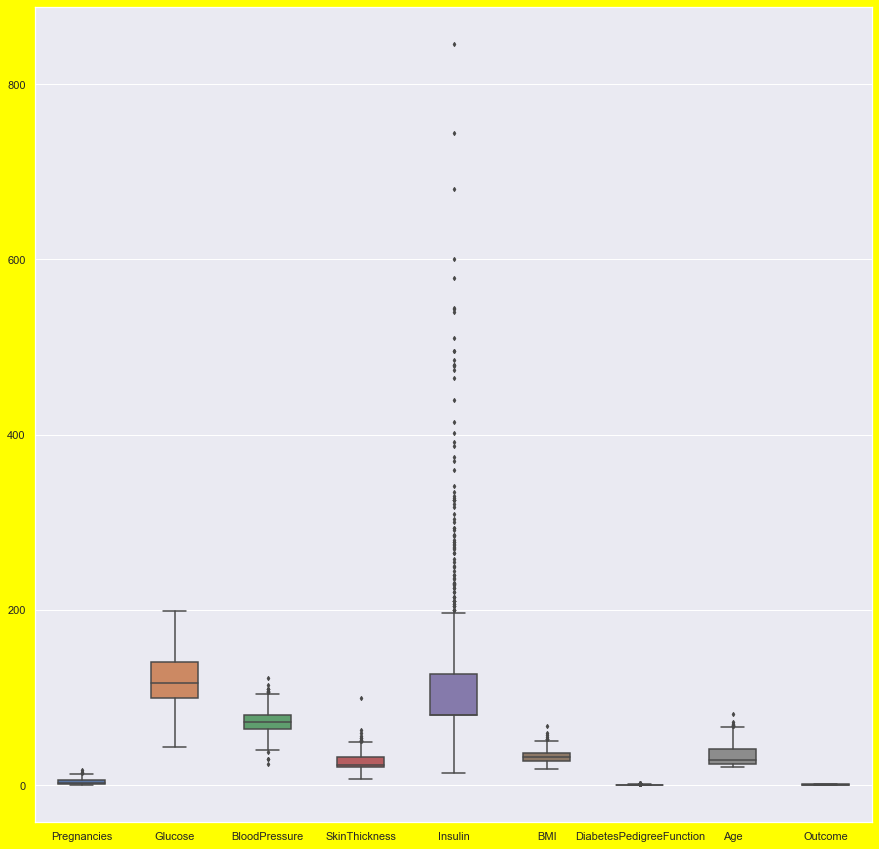

In [7]:
fig,ax=plt.subplots(figsize=(15,15),facecolor='yellow')
sns.boxplot(data=data,ax=ax,width= 0.5,fliersize=3)

In [8]:
a=data['Pregnancies'].quantile(0.98)
cleaned_data=data[data['Pregnancies']<a]

a=data['BloodPressure'].quantile(0.97)
cleaned_data=data[data['BloodPressure']<a]

a=data['SkinThickness'].quantile(0.99)
cleaned_data=data[data['SkinThickness']<a]

a=data['Insulin'].quantile(0.97)
cleaned_data=data[data['Insulin']<a]

a=data['Pregnancies'].quantile(0.98)
cleaned_data=data[data['Pregnancies']<a]

a=data['BMI'].quantile(0.98)
cleaned_data=data[data['BMI']<a]

a=data['Age'].quantile(0.98)
cleaned_data=data[data['Age']<a]


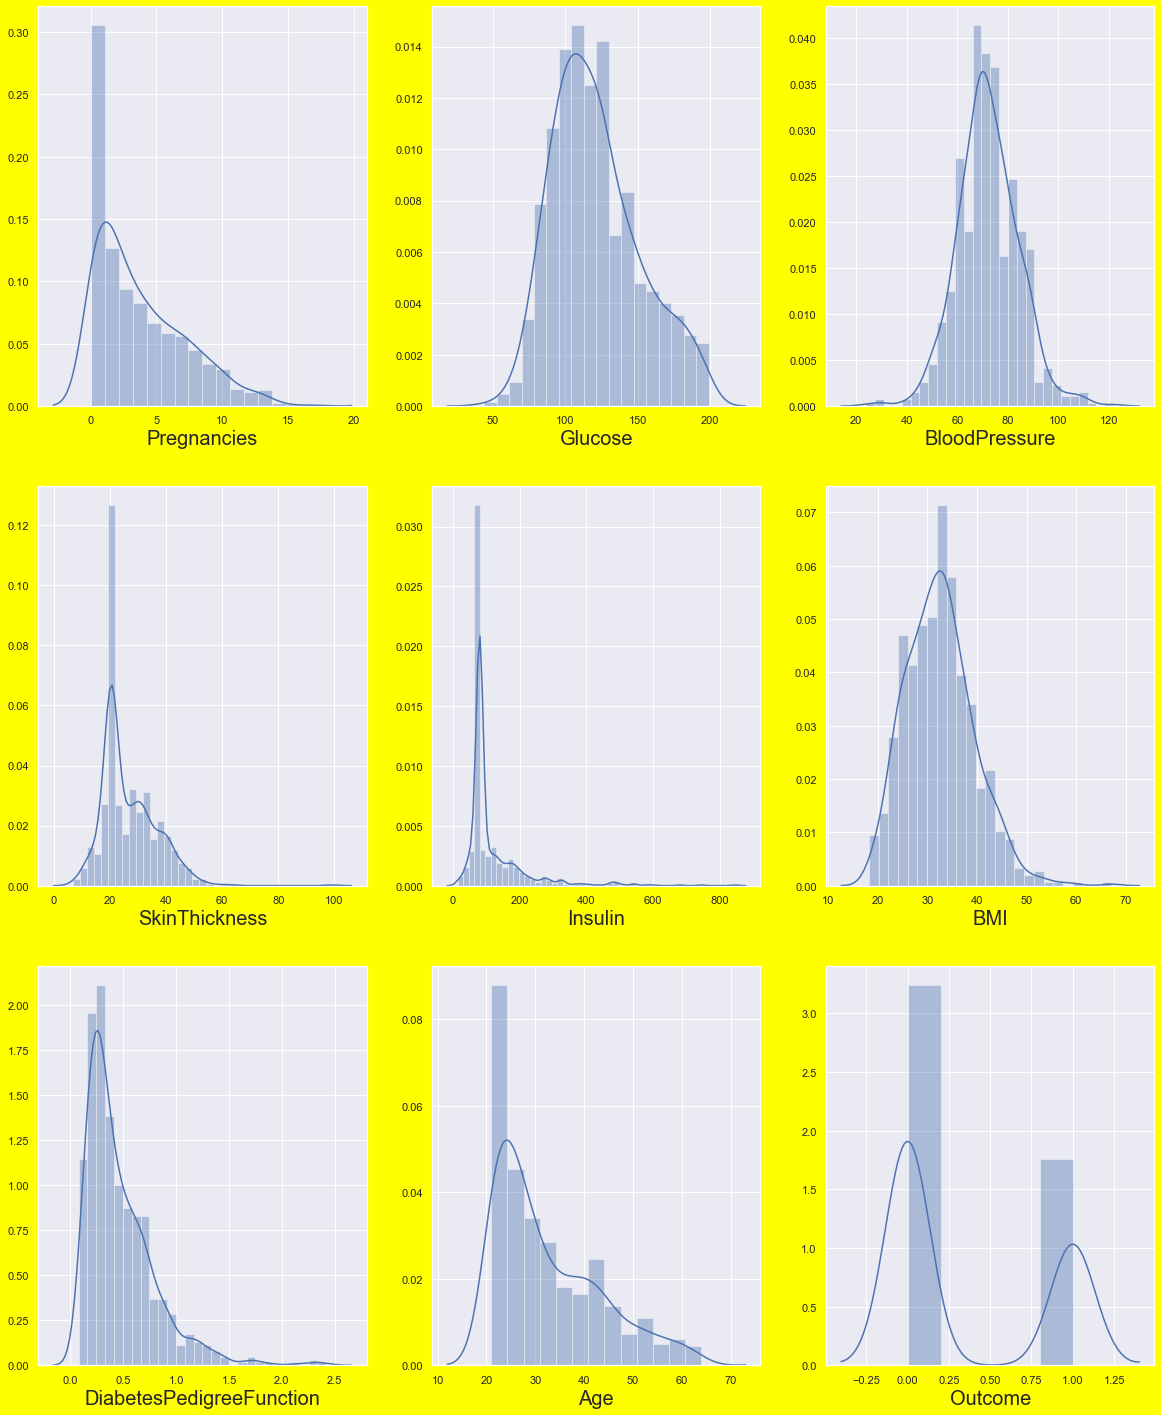

In [9]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in cleaned_data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(cleaned_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [10]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

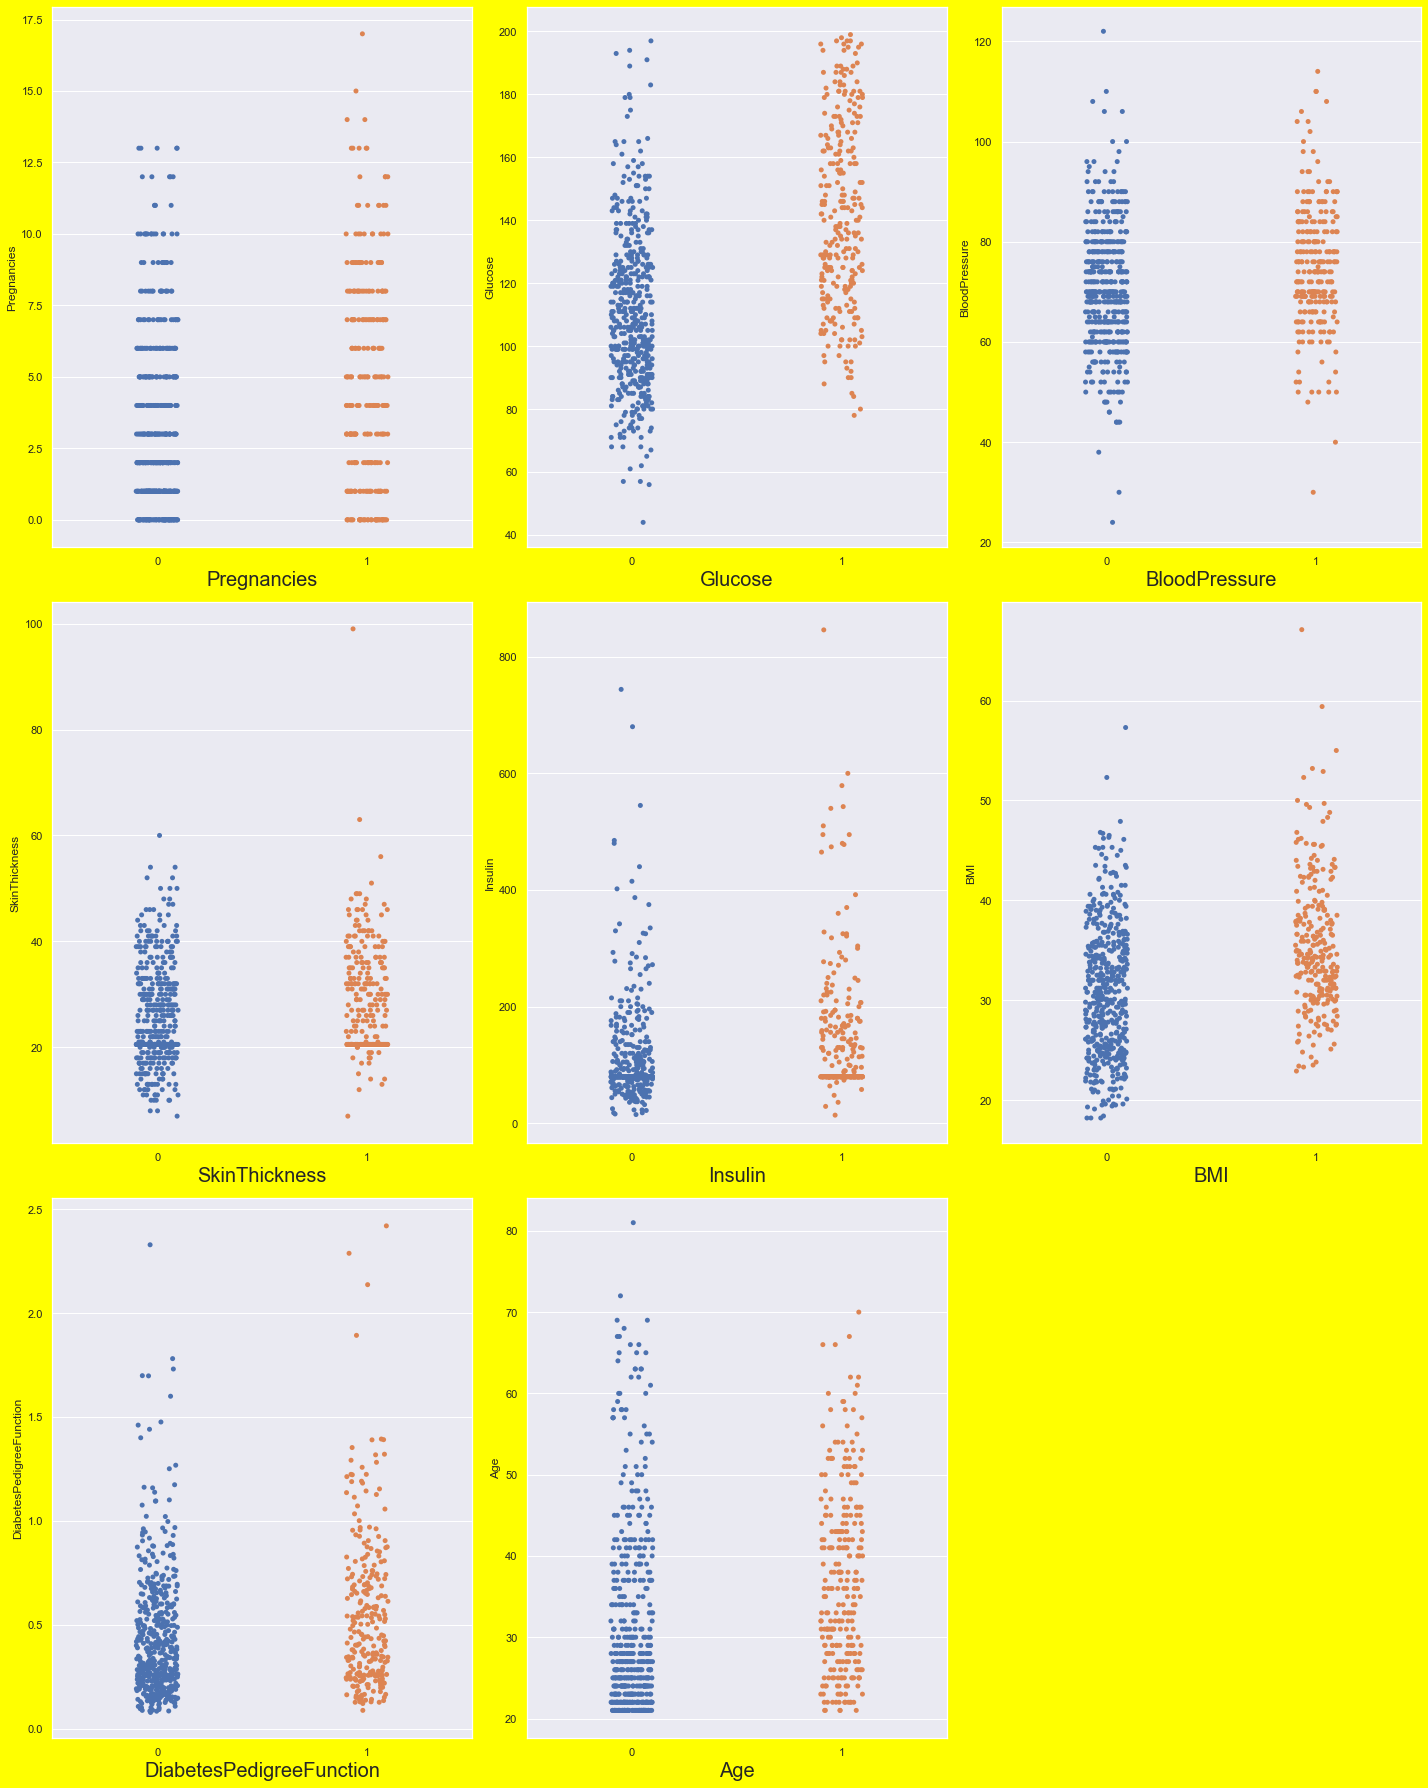

In [11]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
#scaler=StandardScaler()
#X_scaled=scaler.fit_transform(X)
#y_scaled=scaler.fit_transform(y)

In [13]:
#X_scaled

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [15]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

D:\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(log_reg, file)

In [17]:
y_pred=log_reg.predict(X_test)

In [18]:
accuracy=accuracy_score(y_test,y_pred)

In [19]:
accuracy

0.7662337662337663

In [20]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7348148148148149

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

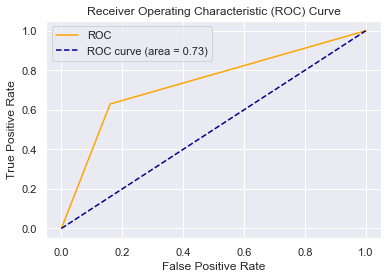

In [22]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [23]:
y_pred=log_reg.predict([[0,0,0,.0,0,.356,0,23]])

In [24]:
y_pred

array([0], dtype=int64)